In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy

In [2]:
os.listdir('inputs/OffresNOVEL/')

['eH_NOVEL_xband_loop3k_zcw144_seed_intensity.json',
 'eH_NOVEL_xband_loop3k_zcw144_fp.json']

In [9]:
filename = 'eH_NOVEL_xband_loop3k_zcw144_seed_intensity.json'
input_dir = 'inputs/OffresNOVEL'
filepath = os.path.join(input_dir, filename)

with open(filepath) as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))
    gB1_0 = data['pulseseq']['components']['emr2']['e']['frequency']
    emr_center = data['settings']['Gyrotron']['em_frequency']

{
  "spinsys": {
    "euler": {
      "alpha": 0,
      "beta": 0,
      "gamma": 0
    },
    "interactions": [
      {
        "name": "shielding",
        "id": 0,
        "entries": {
          "x": 2.00263,
          "y": 2.00259,
          "z": 2.00234,
          "id": 0,
          "euler": {
            "alpha": 0,
            "beta": 1.5707963267948966,
            "gamma": 0
          }
        }
      },
      {
        "name": "csa",
        "id": 1,
        "entries": {
          "x": 0,
          "y": 0,
          "z": 0,
          "id": 1,
          "euler": {
            "alpha": 0,
            "beta": 0,
            "gamma": 0
          }
        }
      },
      {
        "name": "hyperfine",
        "id": 2,
        "entries": {
          "id1": 0,
          "id2": 1
        }
      }
    ],
    "spins": {
      "0": {
        "type": "e",
        "x": 0,
        "y": 0,
        "z": 0,
        "t1": 0.0003,
        "t2": 1e-06
      },
      "1": {
        "type": "H

In [15]:
offsets = np.arange(-15e6, 15e6, 2e5)
print(len(offsets))
gB1_vals = []
emr_vals = []
for offset in offsets:
    gB1 = np.sqrt(np.abs(gB1_0**2 - offset**2))
    gB1_vals.append(gB1)
    emr_val = emr_center + offset
    emr_vals.append(emr_val)

150


In [50]:
dest_dir = 'inputs/OffresNOVEL/fp_files_se'
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

i = 0
for gB1_val, emr_val in zip(gB1_vals, emr_vals):
    temp = deepcopy(data)
    temp['pulseseq']['components']['emr2']['e']['frequency'] = gB1_val
    temp['pulseseq']['components']['emr2']['e']['phase'] = 180
    temp['pulseseq']['components']['emr1']['e']['frequency'] = 0
    temp['pulseseq']['components']['emr1']['e']['phase'] = -90
    temp['settings']['Gyrotron']['em_frequency'] = emr_val
    new_filename = f'eH_offresNOVEL_fp_{i:03d}.json'
    new_filepath = os.path.join(dest_dir, new_filename)
    with open(new_filepath, 'w') as json_file:
        json.dump(temp, json_file, indent=2)
    i += 1

In [38]:
dest_dir = 'inputs/OffresNOVEL/fp_files'
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

i = 0
for gB1_val, emr_val in zip(gB1_vals, emr_vals):
    temp = deepcopy(data)
    temp['pulseseq']['components']['emr2']['e']['frequency'] = gB1_val
    temp['pulseseq']['components']['emr2']['e']['phase'] = 180
    temp['pulseseq']['components']['emr1']['e']['frequency'] = gB1_val
    temp['pulseseq']['components']['emr1']['e']['phase'] = -90
    temp['settings']['Gyrotron']['em_frequency'] = emr_val
    new_filename = f'eH_offresNOVEL_fp_{i:03d}.json'
    new_filepath = os.path.join(dest_dir, new_filename)
    with open(new_filepath, 'w') as json_file:
        json.dump(temp, json_file, indent=2)
    i += 1

In [39]:
dest_dir = 'inputs/OffresNOVEL/fp_files_ref'
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

i = 0
for gB1_val, emr_val in zip(gB1_vals, emr_vals):
    temp = deepcopy(data)
    temp['pulseseq']['components']['emr2']['e']['frequency'] = 0
    temp['pulseseq']['components']['emr1']['e']['frequency'] = 0
    temp['settings']['Gyrotron']['em_frequency'] = emr_val
    new_filename = f'eH_offresNOVEL_fp_{i:03d}.json'
    new_filepath = os.path.join(dest_dir, new_filename)
    with open(new_filepath, 'w') as json_file:
        json.dump(temp, json_file, indent=2)
    i += 1

In [40]:
dest_dir = 'inputs/OffresNOVEL/fp_files_neg'
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

i = 0
for gB1_val, emr_val in zip(gB1_vals, emr_vals):
    temp = deepcopy(data)
    temp['pulseseq']['components']['emr2']['e']['frequency'] = gB1_val
    temp['pulseseq']['components']['emr2']['e']['phase'] = 180
    temp['pulseseq']['components']['emr1']['e']['frequency'] = gB1_val
    temp['pulseseq']['components']['emr1']['e']['phase'] = 90
    temp['settings']['Gyrotron']['em_frequency'] = emr_val
    new_filename = f'eH_offresNOVEL_fp_{i:03d}.json'
    new_filepath = os.path.join(dest_dir, new_filename)
    with open(new_filepath, 'w') as json_file:
        json.dump(temp, json_file, indent=2)
    i += 1

## Results

In [51]:
results_se_dir = 'outputs/OffresNOVEL/fp_files_se/'
filenames_se = sorted(list(os.listdir(results_se_dir))) 
results_se = []
for filename in filenames_se:
    filepath = os.path.join(results_se_dir, filename)
    with open(filepath, 'r') as f:
        f.readline()
        val = f.readline()
        val = float(val.strip())
        results_se.append(val)
print(f'{len(results)} results collected.')

150 results collected.


In [41]:
results_dir = 'outputs/OffresNOVEL/fp_files/'
filenames = sorted(list(os.listdir(results_dir))) 
results = []
for filename in filenames:
    filepath = os.path.join(results_dir, filename)
    with open(filepath, 'r') as f:
        f.readline()
        val = f.readline()
        val = float(val.strip())
        results.append(val)
print(f'{len(results)} results collected.')

150 results collected.


In [42]:
results_ref_dir = 'outputs/OffresNOVEL/fp_files_ref/'
filenames_ref = sorted(list(os.listdir(results_ref_dir))) 
results_ref = []
for filename in filenames_ref:
    filepath = os.path.join(results_ref_dir, filename)
    with open(filepath, 'r') as f:
        f.readline()
        val = f.readline()
        val = float(val.strip())
        results_ref.append(val)
print(f'{len(results_ref)} results collected.')

150 results collected.


In [43]:
results_neg_dir = 'outputs/OffresNOVEL/fp_files_neg/'
filenames_neg = sorted(list(os.listdir(results_neg_dir))) 
results_neg = []
for filename in filenames_neg:
    filepath = os.path.join(results_neg_dir, filename)
    with open(filepath, 'r') as f:
        f.readline()
        val = f.readline()
        val = float(val.strip())
        results_neg.append(val)
print(f'{len(results_neg)} results collected.')

150 results collected.


In [52]:
enhancements1 = -np.array(results) / np.array(results_ref)
enhancements2 = -np.array(results_neg) / np.array(results_ref)
enhancements_se = -np.array(results_se) / np.array(results_ref)

In [48]:
x = offsets

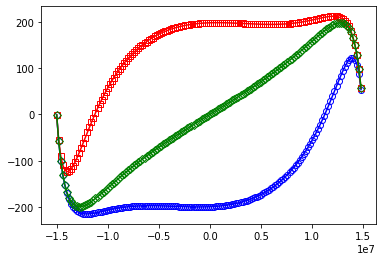

In [54]:
fig = plt.figure()
plt.plot(x, enhancements1, 'bo-', markerfacecolor='none')
plt.plot(x, enhancements2, 'rs-', markerfacecolor='none')
plt.plot(x, enhancements_se, 'gD-', markerfacecolor='none')
plt.show()